# SFO Flight Delays Data for 1987-2008

Data taken from http://stat-computing.org/dataexpo/2009/the-data.html

This notebook downloads only SFO data fo 1987-2008 years directly from the site, 
removes some columns it and concatenates data to a singular Dataframe.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
path = 'http://stat-computing.org/dataexpo/2009/'
df = pd.DataFrame()
list_ = []
for yr in range(1987,2009):
    url = 'http://stat-computing.org/dataexpo/2009/' + str(yr) + ".csv.bz2"
    print ".. reading:", url
    tmp = pd.read_csv(url,index_col=None, header=0, compression='bz2')
    tmp.drop(['DepTime','CRSDepTime','ArrTime','CRSArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','Distance','TaxiIn','TaxiOut'], axis=1, inplace=True)
    tmp.drop(tmp[(tmp['Origin'] != 'SFO') & (tmp['Dest'] != 'SFO')].index, inplace=True)
    list_.append(tmp)
df = pd.concat(list_)

.. reading: http://stat-computing.org/dataexpo/2009/1987.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1988.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1989.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1990.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1991.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1992.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1993.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1994.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1995.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1996.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1997.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1998.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/1999.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/2000.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/2001.csv.bz2
.. reading: http://stat-c

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


.. reading: http://stat-computing.org/dataexpo/2009/2004.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/2005.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/2006.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/2007.csv.bz2
.. reading: http://stat-computing.org/dataexpo/2009/2008.csv.bz2


In [3]:
df = df.assign(Date=pd.to_datetime(df[['Year', 'Month']].assign(day=1)))
df.tail()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
7009350,2008,12,13,6,DL,1074,N644DL,-16.0,3.0,SFO,ATL,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-01
7009369,2008,12,13,6,DL,1096,N380DA,-24.0,-9.0,SFO,CVG,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-01
7009373,2008,12,13,6,DL,1101,N3765,4.0,-3.0,CVG,SFO,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-01
7009413,2008,12,13,6,DL,1160,N380DA,31.0,13.0,CVG,SFO,0,NaN,0,13.0,0.0,18.0,0.0,0.0,2008-12-01
7009689,2008,12,13,6,DL,1594,N3765,-22.0,0.0,SFO,CVG,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-01


In [4]:
# Convert to time series
df.set_index(['Date'],inplace=True)
df.tail()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Date,,,,,,,,,,,,,,,,,,,
2008-12-01,2008,12,13,6,DL,1074,N644DL,-16.0,3.0,SFO,ATL,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008-12-01,2008,12,13,6,DL,1096,N380DA,-24.0,-9.0,SFO,CVG,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008-12-01,2008,12,13,6,DL,1101,N3765,4.0,-3.0,CVG,SFO,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008-12-01,2008,12,13,6,DL,1160,N380DA,31.0,13.0,CVG,SFO,0,NaN,0,13.0,0.0,18.0,0.0,0.0
2008-12-01,2008,12,13,6,DL,1594,N3765,-22.0,0.0,SFO,CVG,0,NaN,0,NaN,NaN,NaN,NaN,NaN


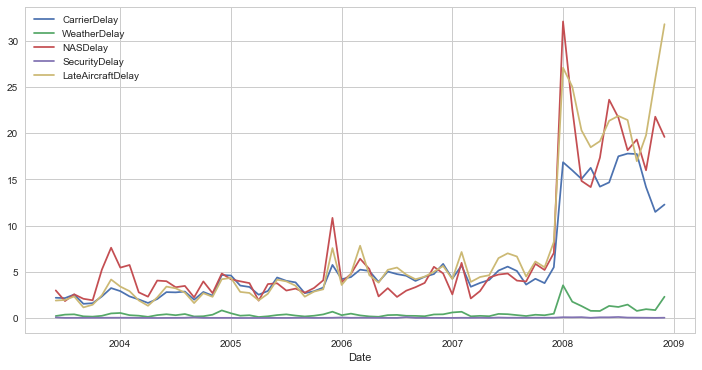

In [5]:
df[['CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].resample('M').mean().plot(figsize=(12,6))

In [6]:
delays = df[['ArrDelay','DepDelay','CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].resample('M').mean()
delays.insert(delays.shape[1],'row_count', delays.index.value_counts().sort_index().cumsum())
delays.tail()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,row_count
Date,,,,,,,,
2008-08-31,10.312859,13.036269,17.801313,1.451009,18.168108,0.044188,21.435639,251
2008-09-30,4.064731,7.568967,17.754768,0.765172,19.329453,0.040377,16.981174,252
2008-10-31,2.686033,6.660139,14.174269,0.953396,15.993555,0.025781,19.785821,253
2008-11-30,5.405349,10.298872,11.484500,0.852967,21.796501,0.013950,25.917405,254
2008-12-31,18.367682,21.626303,12.283641,2.303125,19.604158,0.028377,31.815876,255


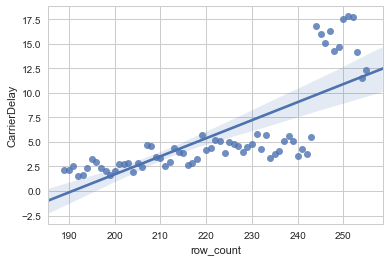

In [7]:
# Regression line for time series
fig = sns.regplot(x="row_count", y="CarrierDelay", data=delays)

In [8]:
# Change x-ticks to dates
ls = [item.get_text() for item in fig.get_xticklabels()]
print ls

labels = []
for x in ls:
    if x != '':
        labels.append(delays.index[int(x, 10)].strftime('%b %Y'))
    else:
        labels.append('')
print labels


[u'', u'190', u'200', u'210', u'220', u'230', u'240', u'250', u'']
['', 'Aug 2003', 'Jun 2004', 'Apr 2005', 'Feb 2006', 'Dec 2006', 'Oct 2007', 'Aug 2008', '']


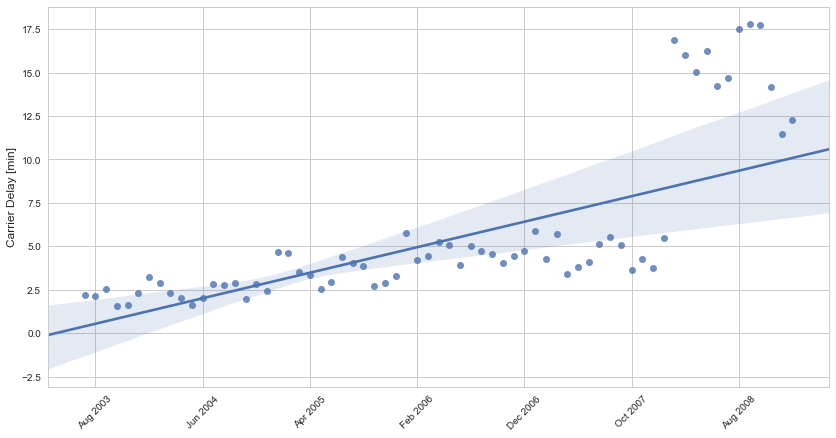

In [9]:
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(x="row_count", y="CarrierDelay", data=delays, ax=ax, robust=True)
ax.set_xticklabels(labels)
plt.xticks(rotation = 45)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Carrier Delay [min]", fontsize=12)
plt.show()        

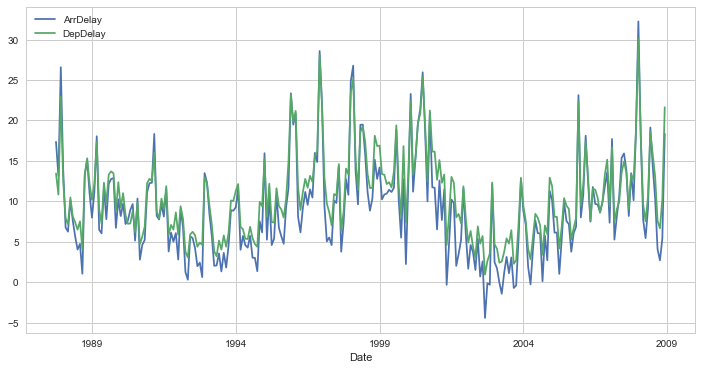

In [10]:
df[['ArrDelay', 'DepDelay']].resample('M').mean().plot(figsize=(12,6))

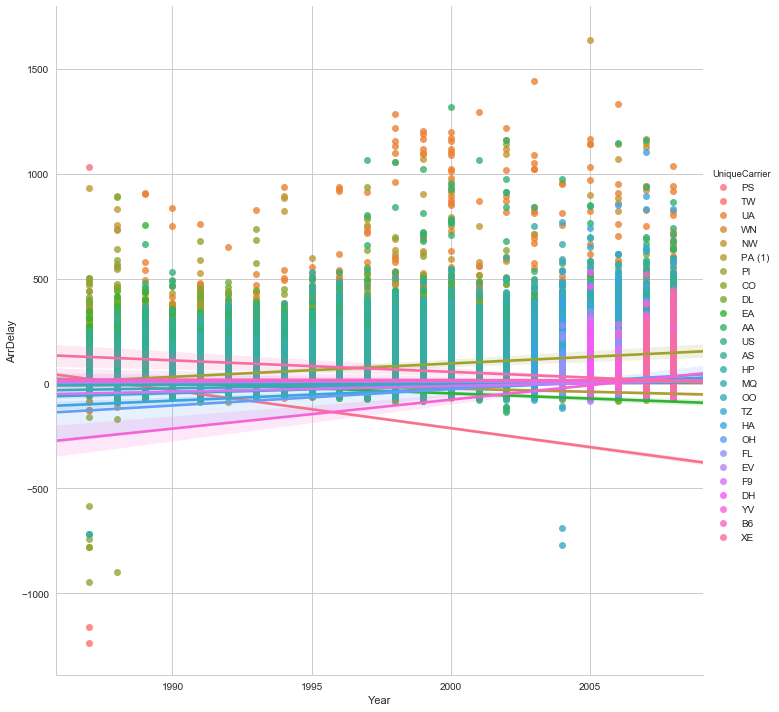

In [11]:
# sns.lmplot(x="Year", y="ArrDelay", hue="UniqueCarrier", data=df, size=10)

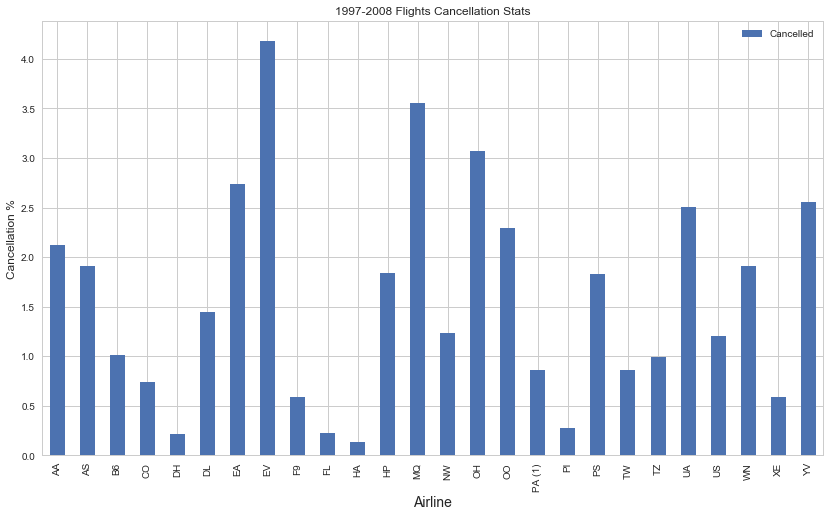

In [12]:
canelationsByCarrier = (df.groupby(['UniqueCarrier']))['UniqueCarrier','Cancelled'].mean()*100
ax = canelationsByCarrier.plot(figsize=(14,8),kind='bar', title ="1997-2008 Flights Cancellation Stats")
ax.set_xlabel("Airline", fontsize=14)
ax.set_ylabel("Cancellation %", fontsize=12)
plt.show()

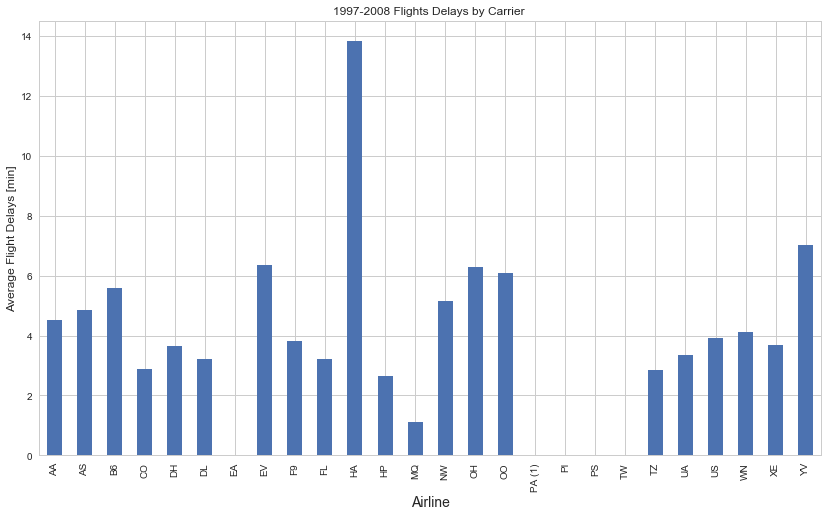

In [13]:
delaysByCarrier = (df.groupby(['UniqueCarrier']))['UniqueCarrier','CarrierDelay'].mean()
ax = delaysByCarrier.plot(figsize=(14,8),kind='bar', title ="1997-2008 Flights Delays by Carrier ",
                          legend=False)
ax.set_xlabel("Airline", fontsize=14)
ax.set_ylabel("Average Flight Delays [min]", fontsize=12)
plt.show()